In [1]:
import os
import pickle
import logging 
from openmmtools.multistate import MultiStateReporter
import tqdm
import numpy as np

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
import matplotlib.transforms as transforms


## barnase:barstar D39A complex @ 2400K with fixed REST2 implementation (4 ang) with 24 replicas @ ASP endstate

### Load nc file

In [2]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/12/117/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'ASP'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [3]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/12/117/117_complex_asp_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [4]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [5]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [00:55<00:00,  5.08s/it]


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: sc

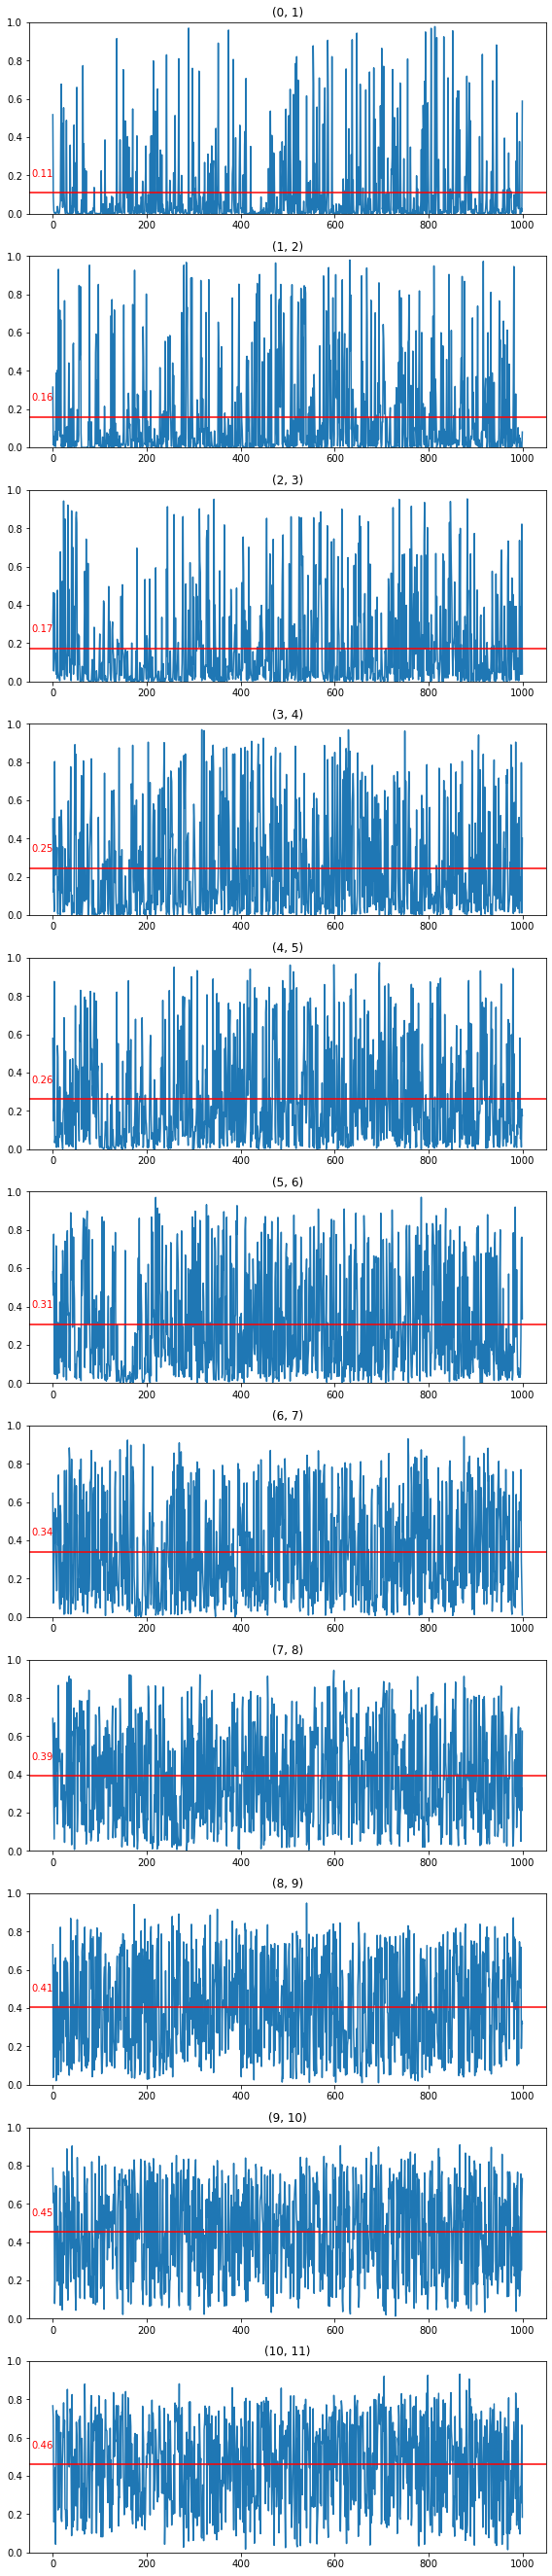

In [6]:
cols = 1
rows = 12
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## barnase:barstar K27A complex @ 2400K with fixed REST2 implementation (4 ang) with 24 replicas @ LYS endstate

### Load nc file

In [7]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/12/119/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'LYS'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [8]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/12/119/119_complex_lys_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [9]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [10]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [00:57<00:00,  5.18s/it]


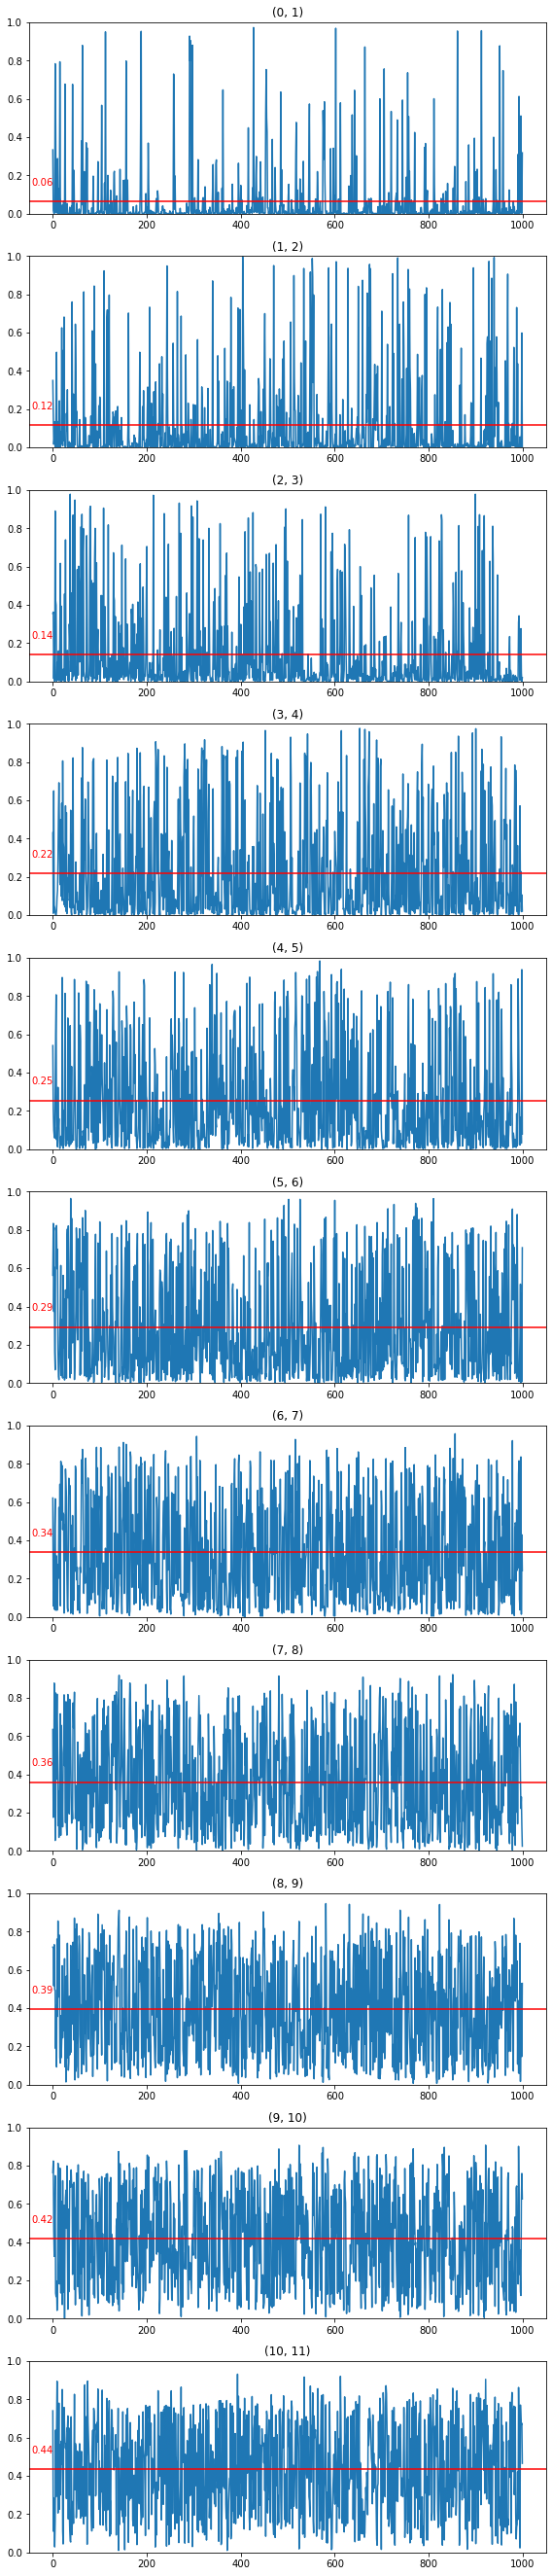

In [11]:
cols = 1
rows = 12
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## barnase:barstar R59A complex @ 2400K with fixed REST2 implementation (4 ang) with 24 replicas @ ARG endstate

### Load nc file

In [12]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/12/121/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'ARG'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [13]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/12/121/121_complex_arg_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [14]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [15]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [00:47<00:00,  4.30s/it]


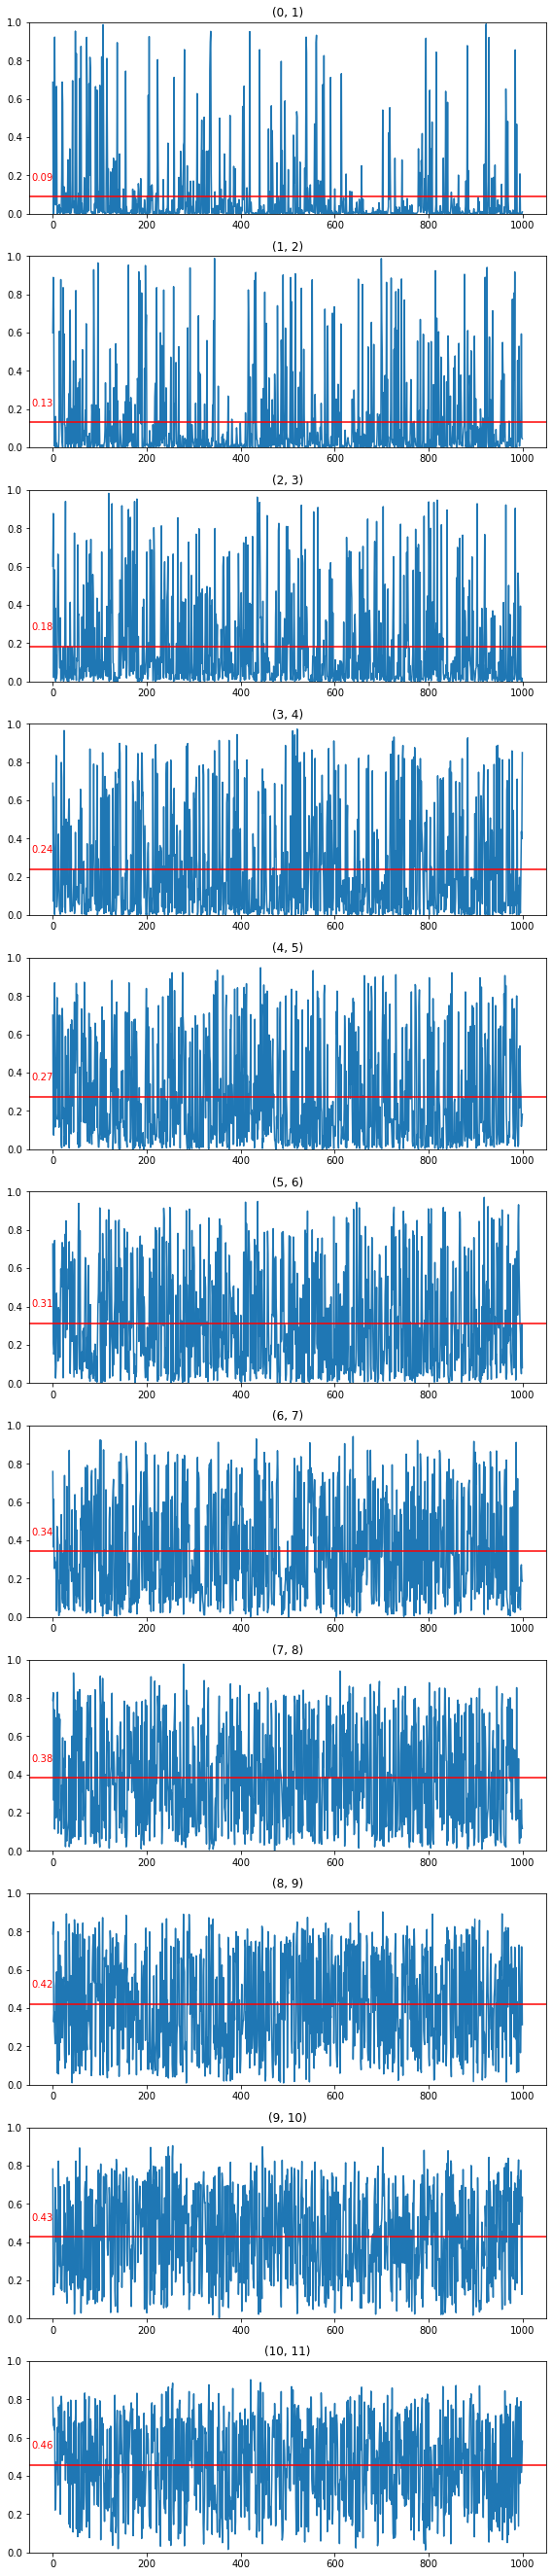

In [16]:
cols = 1
rows = 12
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## barnase:barstar R83Q complex @ 2000K with fixed REST2 implementation (4 ang) with 20 replicas @ ARG endstate

### Load nc file

In [20]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/12/123/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'ARG'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [21]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/12/123/123_complex_arg_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [22]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [23]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [00:56<00:00,  5.10s/it]


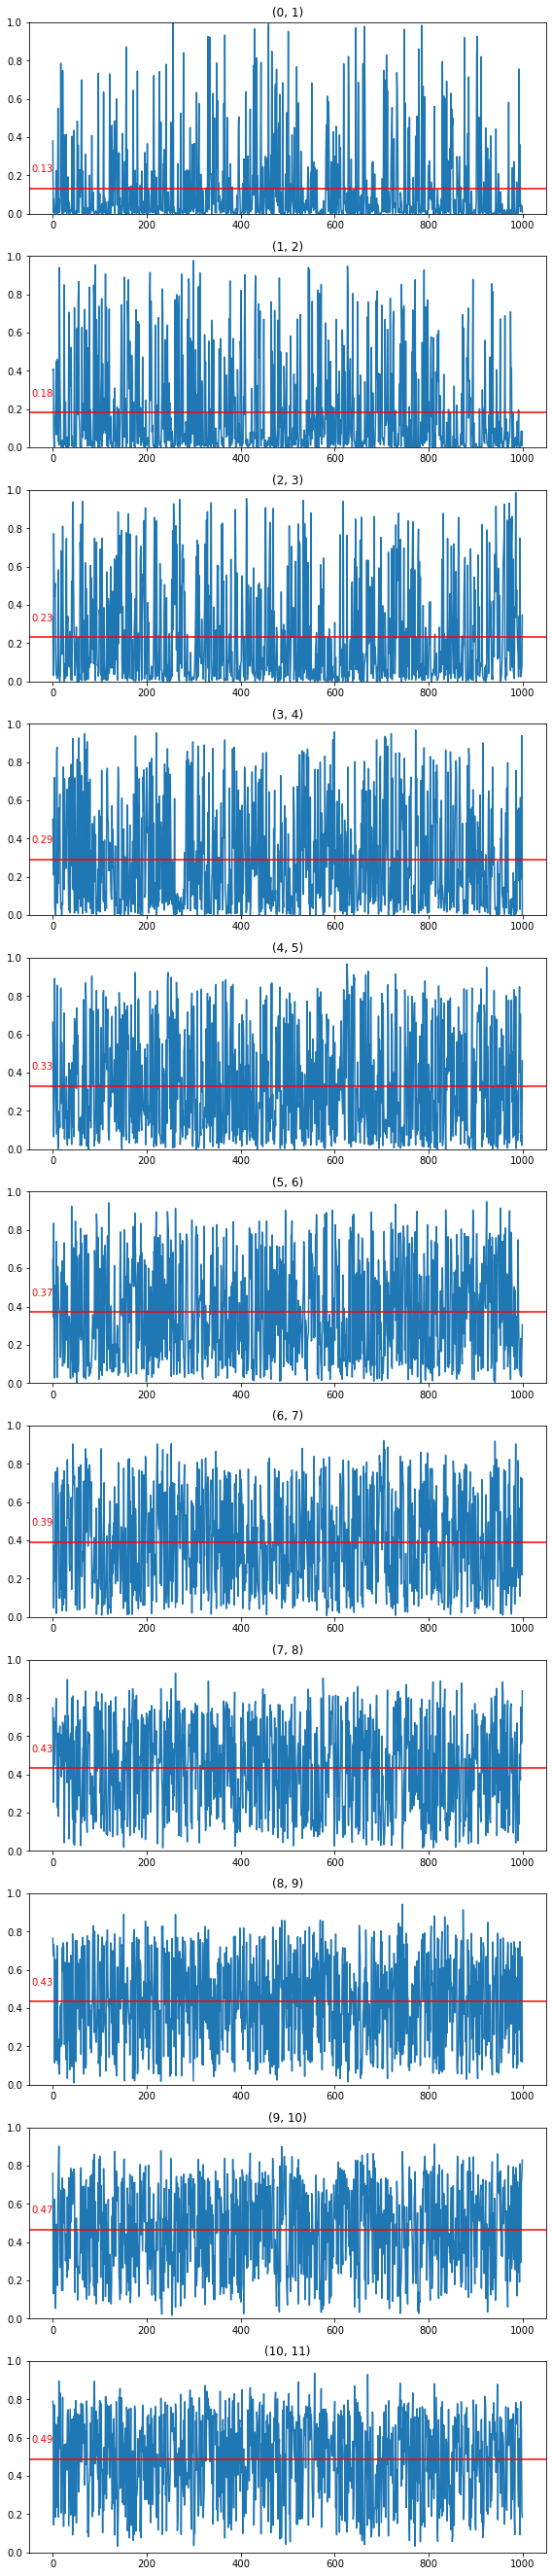

In [24]:
cols = 1
rows = 12
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## barnase:barstar R87A complex @ 2000K with fixed REST2 implementation (4 ang) with 20 replicas @ ARG endstate

### Load nc file

In [25]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/12/125/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'complex'
endstate = 0
aa = 'ARG'.lower()
length = '1ns'
with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)


In [26]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


DEBUG:openmmtools.multistate.multistatereporter:Initial checkpoint file automatically chosen as /data/chodera/zhangi/perses_benchmark/neq/12/125/125_complex_arg_1ns_checkpoint.nc
DEBUG:openmmtools.multistate.multistatereporter:checkpoint_interval != on-file checkpoint interval! Using on file analysis interval of 1.


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [27]:
states = range(12)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [28]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 1001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 11/11 [00:42<00:00,  3.88s/it]


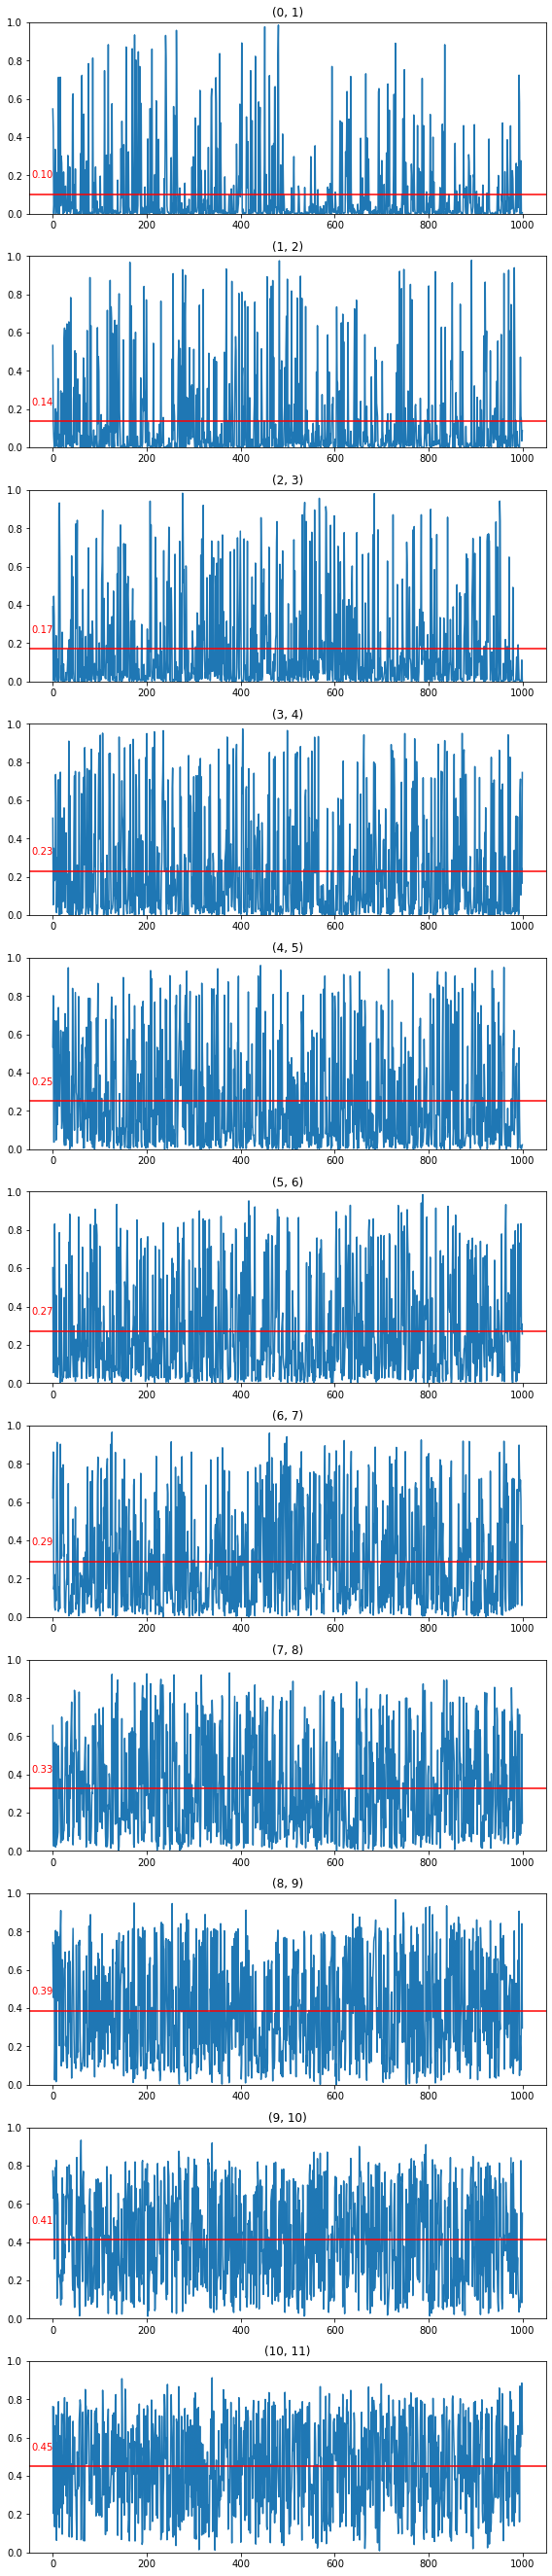

In [29]:
cols = 1
rows = 12
plt.figure(figsize=(8, 40))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")
#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

In [36]:
from simtk import unit
import math
n_replicas = 20  # Number of temperature replicas.
T_min = 298.0 * unit.kelvin  # Minimum temperature.
T_max = 1600 * unit.kelvin  # Maximum temperature.
temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(n_replicas-1)) - 1.0) / (math.e - 1.0)
                for i in range(n_replicas)]

In [37]:
temperatures

[Quantity(value=298.0, unit=kelvin),
 Quantity(value=338.948869207112, unit=kelvin),
 Quantity(value=382.11066618890555, unit=kelvin),
 Quantity(value=427.60498031209033, unit=kelvin),
 Quantity(value=475.5578637013539, unit=kelvin),
 Quantity(value=526.1021804948329, unit=kelvin),
 Quantity(value=579.3779749737853, unit=kelvin),
 Quantity(value=635.5328595864457, unit=kelvin),
 Quantity(value=694.7224239411736, unit=kelvin),
 Quantity(value=757.1106659020984, unit=kelvin),
 Quantity(value=822.8704459817097, unit=kelvin),
 Quantity(value=892.1839662893868, unit=kelvin),
 Quantity(value=965.243275362903, unit=kelvin),
 Quantity(value=1042.2508002816505, unit=kelvin),
 Quantity(value=1123.419907535926, unit=kelvin),
 Quantity(value=1208.97549420629, unit=kelvin),
 Quantity(value=1299.1546110909915, unit=kelvin),
 Quantity(value=1394.2071195079732, unit=kelvin),
 Quantity(value=1494.3963835912768, unit=kelvin),
 Quantity(value=1600.0, unit=kelvin)]

In [6]:
n_replicas = 12  # Number of temperature replicas.
T_min = 298.0 * unit.kelvin  # Minimum temperature.
T_max = 1200 * unit.kelvin  # Maximum temperature.
temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(n_replicas-1)) - 1.0) / (math.e - 1.0)
                for i in range(n_replicas)]

In [7]:
temperatures

[Quantity(value=298.0, unit=kelvin),
 Quantity(value=347.95853028599566, unit=kelvin),
 Quantity(value=402.6715859162709, unit=kelvin),
 Quantity(value=462.5916524047109, unit=kelvin),
 Quantity(value=528.2142780581083, unit=kelvin),
 Quantity(value=600.0821722380443, unit=kelvin),
 Quantity(value=678.7896936520565, unit=kelvin),
 Quantity(value=764.9877657929634, unit=kelvin),
 Quantity(value=859.3892601777964, unit=kelvin),
 Quantity(value=962.7748919065651, unit=kelvin),
 Quantity(value=1075.999676298049, unit=kelvin),
 Quantity(value=1200.0, unit=kelvin)]